
# **Protein sequence Alignment of TEM-1 with 100 homologs**:
NCBI Blast protein alignment is used to align TEM-1 beta lactamase with 100 proteins.
For the blast search RefSeq library was selected. 

Results:
The alignemnt comprises 95 class A beta lactamases and 5 serine hydrolases. The Identity which reports on the percantage of matching amino acids between the aligned sequece and TEM-1 ranges from 47.5% - 99.65%.

# **Alignment Analysis** 
1. Alignment Heatmap
2. Calculation of conservation score & consensus sequence  
    2.1 Pei & Grishin conservation
    2.2 Shannon entropy
    2.3 Comparision of Pei & Grishin and Shannon conservation
    - Barplot
    - Correlation scatter plot 
3. Correlation of DMS and conservation scores
    - Correlation scatter Plots 
4. Concensus seqence Alignment with TEM1
    4.1 Self calculated concensus sequence 
    4.2 Emboss Concensus Sequence Calculation
    - Blosum62, PAM250
    - Blosum90
    - PAM460
    4.3 Reference Emboss alignment
    



       


# 1.Alignment Heatmap

In [5]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Creating the parameters for the heatmap

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']


aa = 'ARNDCQEGHILKMFPSTWYV-'

# This is the fasta file with the 100 aligned sequences
fasta_file = "TEM-1_Alignment_100_Homolgs.aln"
sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

#Converting fasta to list with 286 Positions 
msa = list(SeqIO.parse(fasta_file,'fasta'))
L = len(msa[0].seq)#286 Positions
N = len(msa)#101 rows

#Creating empty data frame for the counted amino acids at each position
freq = np.zeros([L,21])
#Creating the concemsus sequence
concensus = np.zeros(L)

In [6]:
#Counts the amino acids for each position and selects the amino acid with the highest frequency for the concensus sequnece

for i in range(0,N):
    for j in range(0,L):
        j_aa = aa.find(msa[i].seq[j])
        freq[j,j_aa] = freq[j,j_aa] + 1 
for i in range(0, L):
    concensus[i] = freq[i].argmax()


In [7]:
#Heatmap with conservation score bar plot and concensus sequence at the bottom 
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

for j in seq_display:
    posit = -float(np.where(seq_display == j)[0]) * spacing_scale - spacing
    axes.text(-5,posit, "Seq "+(str(j+1)))
    for i in range(0, L):
        axes.text(float(i),posit, msa[j].seq[i],
           
            bbox= dict(facecolor=palette[aa.find(msa[j].seq[i])], alpha=0.5),fontdict=font)


#shows the concensus sequence at the bottom
posit = posit - spacing
axes.text(-5,posit, "Concensus")
for i in range(0, L):
    axes.text(float(i),posit, 'ARNDCQEGHILKMFPSTWYV-'[int(concensus[i])] ,
                bbox=dict(facecolor=palette[int(concensus[i])], 
                alpha=0.5),fontdict=font)
    
figure

TypeError: only size-1 arrays can be converted to Python scalars

# 2. Calculation of conservation score & modeling of concensus sequence



## 2.1 Pei & Grishin conservation
Measures the root mean square deviation between the amino acid distribution p~ia and the average amino acid distribution E. As the point mutation ranges from 1-20 possible amino acid  E is 1/20.

     V = √∑(p_ia/N-E)^2 
    max: V = 0 (each a 5x times in alignemnt)
    min: V = 0.95 (total conserved position)










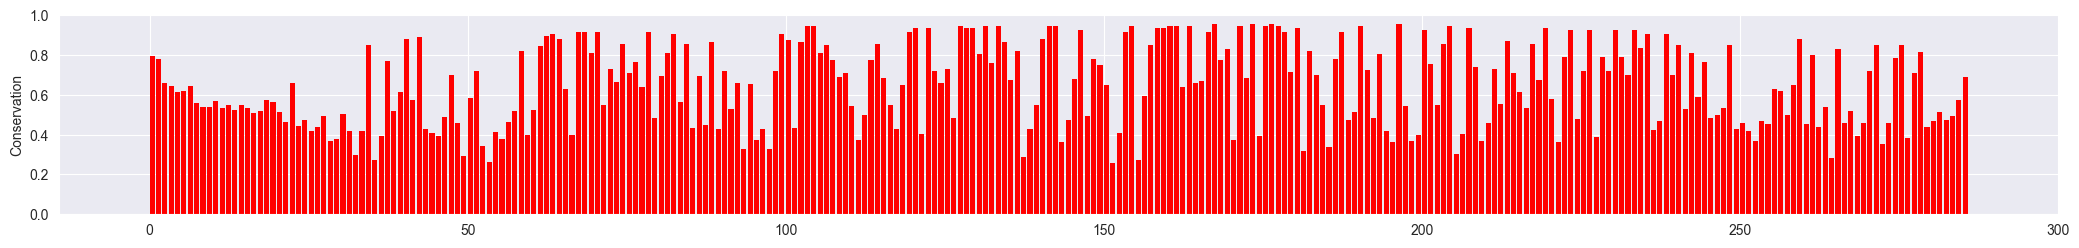

In [8]:
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

figure

# 2.2 Shannon entropy
The entropy H for each position with amino acid frequency p_ia is:

    H = - ∑p_ialog2(p_ia)
    min: H = 0 (total conserved position)
    max: H = 4.321 (each a 5x times in alignemnt)

- the negative sum of the logarithmus base two multiplied by the proportion of amino acid a is calculated for each amino acid a = 1-20 





C:\Users\malte\AppData\Local\Temp\ipykernel_27924\1332840514.py:4: RuntimeWarning: divide by zero encountered in log2
  log_nmb = freq/N* np.log2(freq/N)
C:\Users\malte\AppData\Local\Temp\ipykernel_27924\1332840514.py:4: RuntimeWarning: invalid value encountered in multiply
  log_nmb = freq/N* np.log2(freq/N)


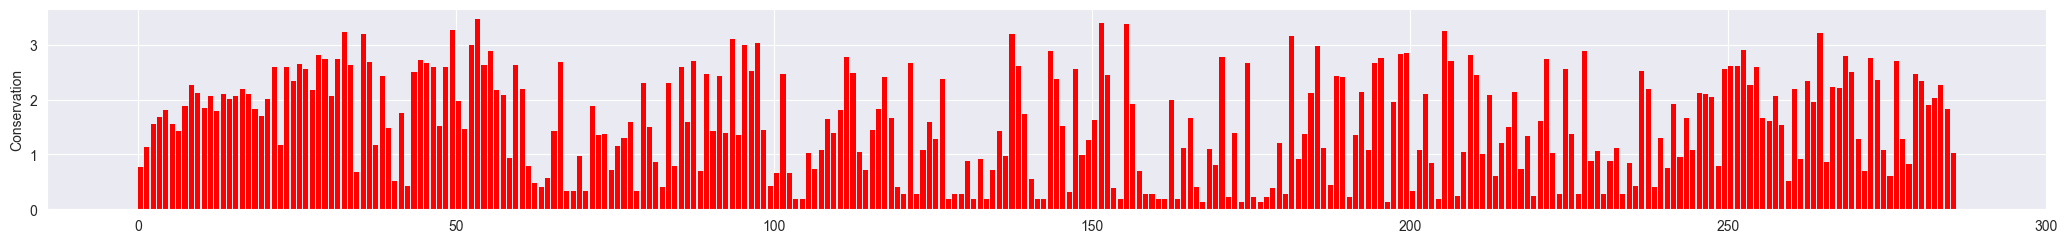

In [9]:
#positions without occurence of one amino acid have values of -inf (value=0, log=-inf )
# convert them to nan
with pd.option_context('mode.use_inf_as_na',True):
    log_nmb = freq/N* np.log2(freq/N)
    log_nmb[ log_nmb == -np.inf] = np.nan 

#ignore nan and calculate the entropy for each position
conservation_Shannon = np.nansum(log_nmb, axis=1,)*-1


figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation_Shannon, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

figure

# 2.3 Comparision of Pei & Grishin and Shannon conservation
Differences of the conservation scores: 

- Pei & Grishin conservation increases with conservation score whereas conservation decreases with increasing Shannon entropy  

- Shannon entropy measures the amount of disorder for each position which is quite sensitive for rare amino acids occurences

- Pei & Grishin conservation is less senistive because the difference between frequencies instead of their ratio is used to measure the variance

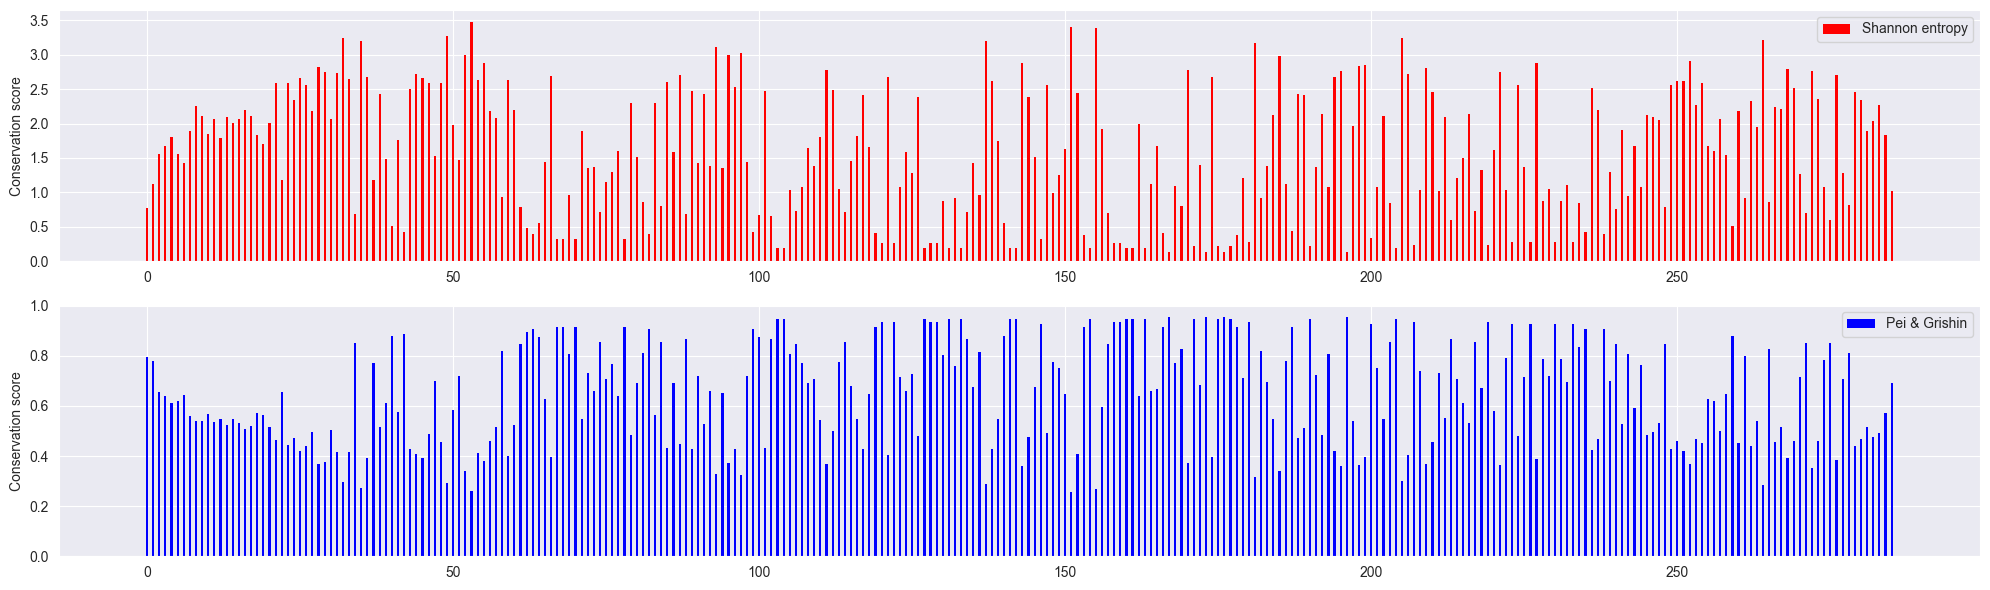

In [10]:
figure = plt.figure(figsize=(20, 6))
axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

width = 0.35 
x = np.arange(L)  

axes1.bar(x, conservation_Shannon, width, align='center', linewidth=0, color='red', label='Shannon entropy')
axes1.set_ylabel('Conservation score')

axes2.bar(x, conservation, width, align='center', linewidth=0, color='blue', label='Pei & Grishin')
axes2.set_ylabel('Conservation score')

spacing_scale = axes1.get_ylim()[1] / 6
spacing = spacing_scale * 2 

axes1.legend()
axes2.legend()

plt.tight_layout()
plt.show()

For better comparability, the conservation scores are z-normalizated.  
The scores should be directling opposing to each other after z-normalisation, as the same trend has the opposite sign.

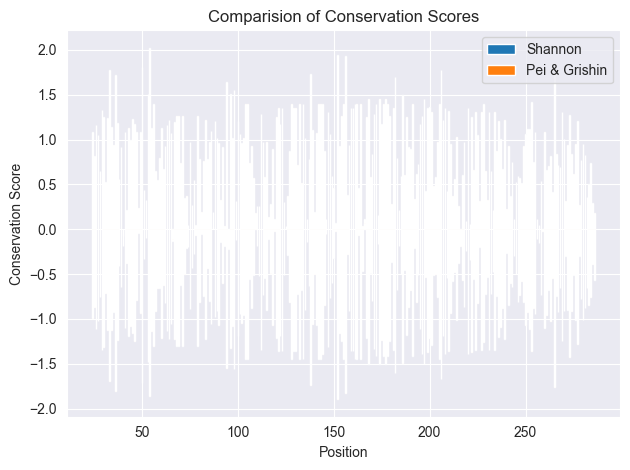

In [16]:
# P&G and Shannon conservation z-normalized
DMS_Conservation  = pd.read_csv('DMS_Conservation.csv')

x = np.arange(24.0, 287.0, 1.0)
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x, DMS_Conservation['Conserved_Shannon'], width, label='Shannon')
rects2 = ax.bar(x, DMS_Conservation['Pei&Grishin'], width, label='Pei & Grishin')

ax.set_xlabel('Position')
ax.set_ylabel('Conservation Score')
ax.set_title('Comparision of Conservation Scores')
ax.legend()
plt.tight_layout()
plt.show()

Opposite bars mean the same trend and are predominantly represented, also the conservation strength (lenght of bars) seems to be quite equal. 

-0.9911817484674176


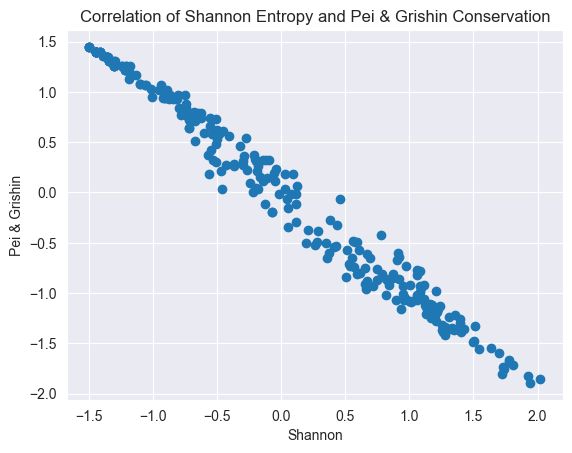

In [21]:
#Calculation of correlation score 
corr = np.corrcoef(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
print(corr[0,1]) #print r value

plt.scatter(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
plt.xlabel('Shannon')
plt.ylabel('Pei & Grishin')
plt.title('Correlation of Shannon Entropy and Pei & Grishin Conservation')
plt.show()

## Results:
     r = 0.99118175
There is significant correlation between the conservation values of both calculation methods.  
For further approach we deicided to use the Shannon Entropy as it is more sensitive.  


# 3. Correlation of DMS and conservation scores

In the following analysis we are going to verify the following hypothesis: 

1. Highly conserved positions have low DMS scores and are more fragile, we do not assume unneccessary conservation.
2. Bad conserved positions have high DMS scores and are robust for mutations.

 

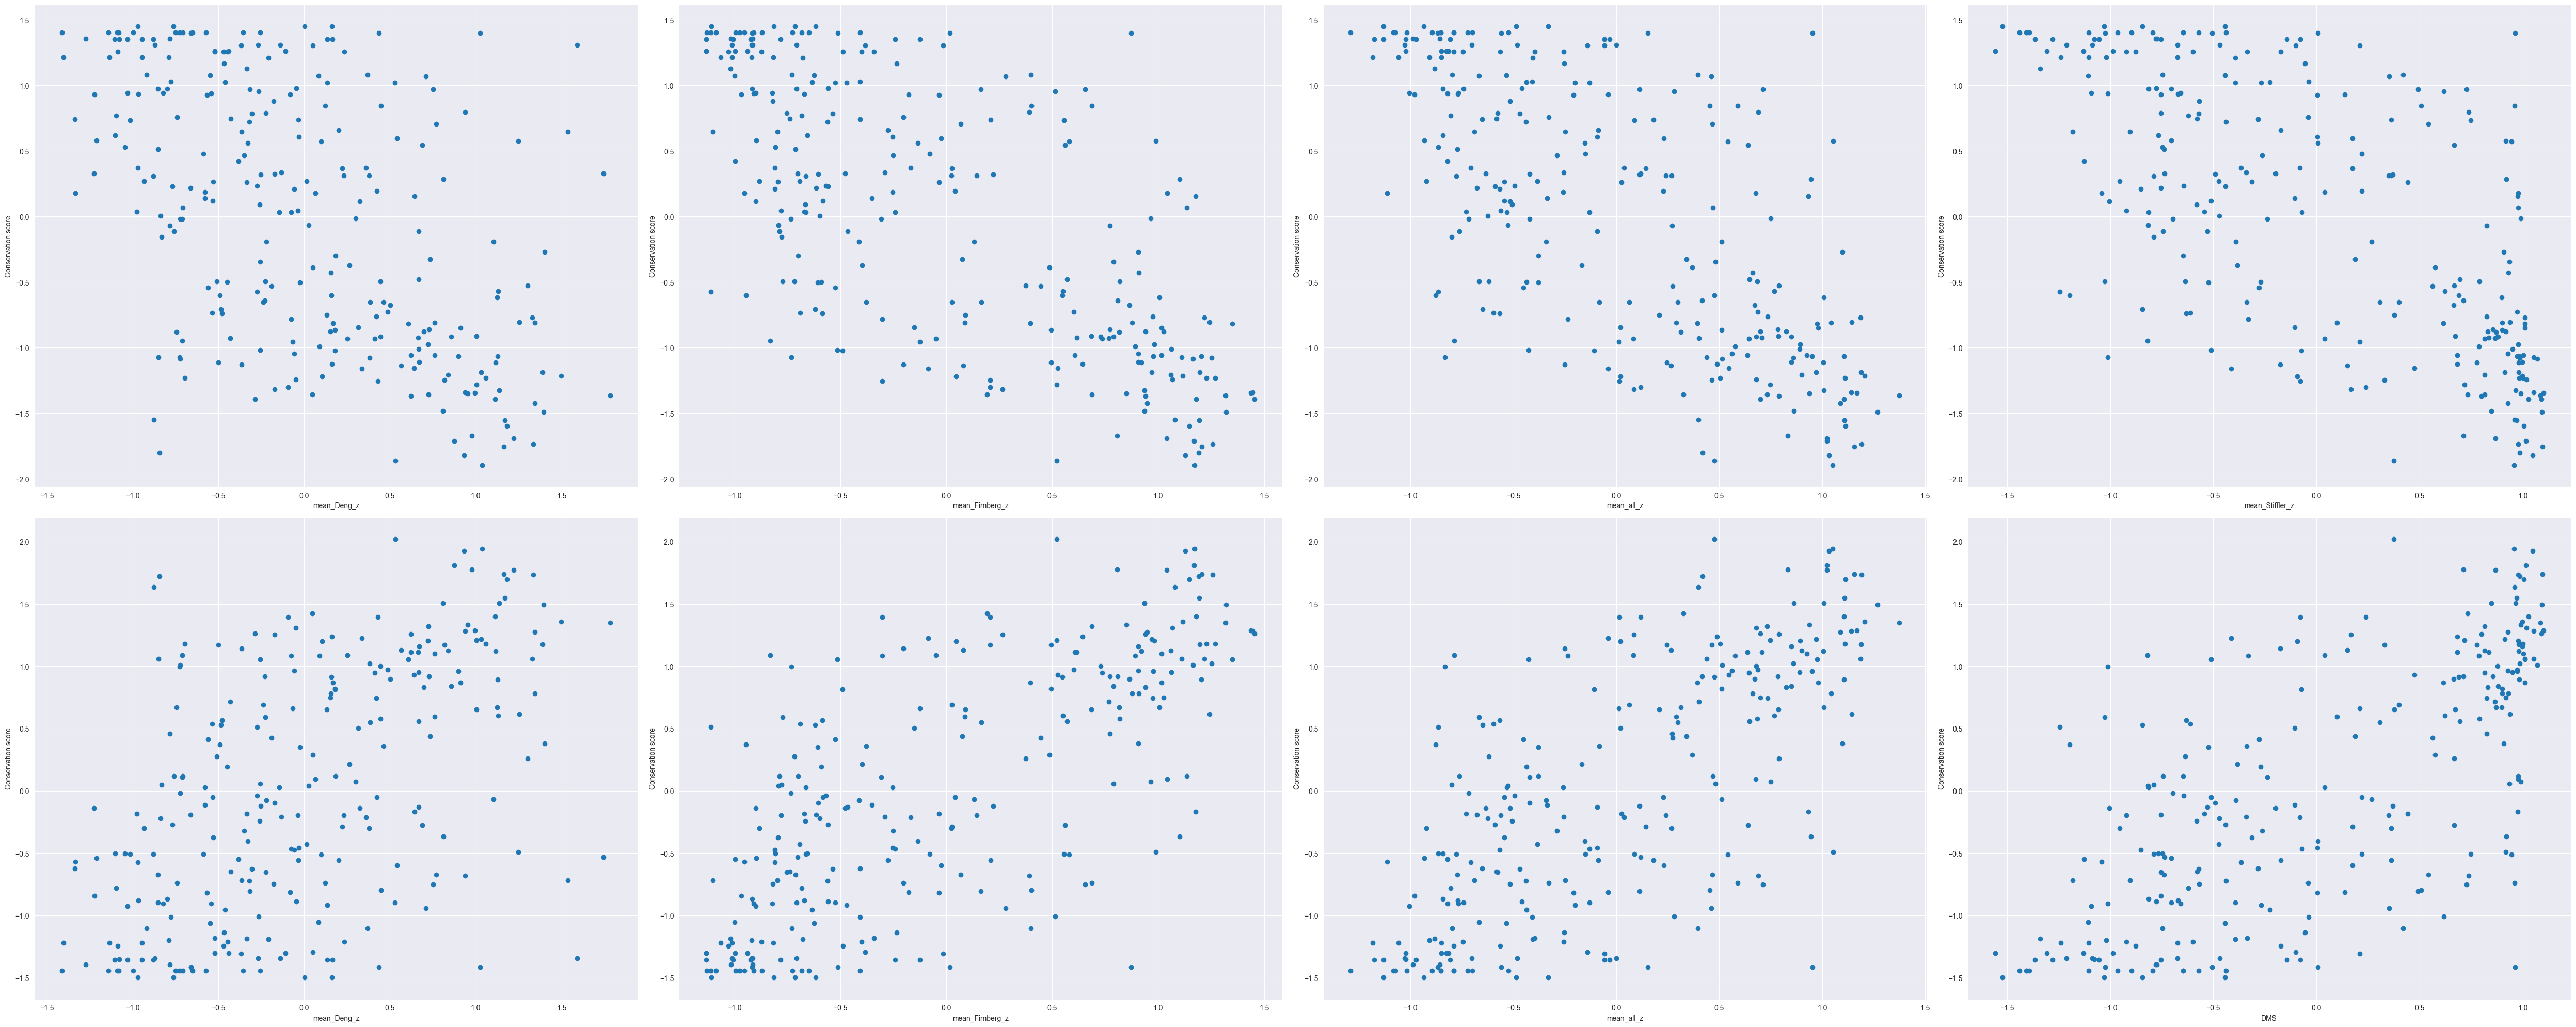

In [22]:
C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)


fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Pei&Grishin' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Pei&Grishin'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])
        axs[0, i-1].set_xlabel(col)  
        axs[0, i-1].set_ylabel('Conservation score')  
        
        axs[1, i-1].set_xlabel(col)  
        axs[1, i-1].set_ylabel('Conservation score')  


plt.xlabel('DMS')
plt.ylabel('Conservation score')
plt.tight_layout()
plt.show()

In [25]:
#Correlation
cor_df = pd.DataFrame(columns =['Shannon', 'Var'])

for col in C_df_New.columns:
    if col == 'Position':
        continue
    else:

        cor_v = C_df_New[col].corr(C_df_New['Pei&Grishin'])
        
        cor_S = C_df_New[col].corr(C_df_New['Conserved_Shannon'])
    
        cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)    

cor_df = cor_df.rename(index={0: 'Stiffler', 1: 'Deng', 2: 'Firnberg', 3: 'Mean', 4 :'variance', 5 : 'Shannon'})
display(cor_df)


AttributeError: 'DataFrame' object has no attribute 'append'

In [28]:
DMS_Conservation

,mean_Stiffler_z,mean_Deng_z,mean_Firnberg_z,mean_all_z,Pei&Grishin,Conserved_Shannon
0,0.786898,0.089304,0.891800,0.577701,-0.988960,1.083764
1,0.899390,0.180497,0.493450,0.510811,-0.863445,0.820711
2,0.998662,0.670128,0.906685,0.849455,-1.108970,1.158366
3,-0.510157,-0.255614,-0.514142,-0.426638,-1.017518,1.055295
4,0.377421,0.132612,0.090621,0.208490,-0.750236,0.654550
...,...,...,...,...,...,...
258,-0.337803,0.463454,-0.376808,-0.083719,-0.653073,0.358021
259,-0.106276,0.316090,-0.152312,0.019167,-0.843693,0.503238
260,0.824699,0.420258,0.974941,0.735770,-0.760648,0.743719
261,0.574070,0.050248,0.486125,0.368077,-0.387165,0.287563


## Results:

### Scatter plots: 
The scatter plots of Pei and Grsihin (upper row) and Shannon (lower row) with each DMS data set are almost exactly identical but opposed, as the same trend has opposite signs in the conservation formulars.  
Across the DMS data sets ther scatter plots show a consistent picture.  
Two clusters can be detected, located in the corners of high conservation and low DMS scores and low conservation and high DMS scores.  
Both hypothesis can be maintained by these results.

### Correlation scores:
There are only minor differences in the correlation between Shannon and P&G with the datasets.
The absolute correlation values are in range of r = 0.53 - 0.71  

The stiffler data set correlation lays in the middle compared to the other two data sets, therefore it is used as well as the merged model for further analysis.

In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax = plt.subplots()

# Position of interest
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='blue', label='Position of interest')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='red', label='Random Position')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'],0 ),
       color='red', alpha=0.5)

ax.set_xlabel('Position')
ax.set_ylabel('Scores')
ax.set_title('Mean Stiffler with Shannon Conservation')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax = plt.subplots()

# Position of interest
ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width, color='blue', label='Position of interest')

ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, color='red', label='Random Position')

ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'],0 ),
       color='red', alpha=0.5)

ax.set_xlabel('Position')
ax.set_ylabel('Scores')
ax.set_title('Merged Model with Shannon Conservation')
ax.legend()

plt.tight_layout()
plt.show()

## Results:
The following positions can be identified in the bar plots:

1. Position of Interest (blue)
    - DMS negative = Fragile 
    - Conservation = Negative
2. Unnecessary conserved Position (green)
    - DMS positive = Robust
    - Conservation = Negative
3. Random Positions
    - DMS positive = Robust
    - Conservation = Positive
4. Destructive Position
    - DMS negative = Fragile
    - Conservation = Positive

Predominant are the positions of interest which support the hypothesesis that fragile positions are conserved.
Unnecessaty conserved positions which are conserved despite high DMS scores, indicating robustness are not very frequent. That supports that conservation only occurs when necessary.
Destructive position contradict that fragility and conservedness correlate and do appear rarely.
Random positions in which mutations can accumulate are nearly as occurent as the positions of interest.

The categorization based on these plots agrees well with our hypotheses.



# 4. Concensus seqence Alignment with TEM1
The concensus sequence is composed by the most frequent amino acids in the given alignment. Therefore evolutionary conservation could be deduced by the concensus sequence which is core of the following analysis. 
The goal is to find correlation between the concensus sequence conservation and the DMS scores.

The following trends are expected: 

1. Mismatches should only occure at random positions with high DMS and low conservation
2. Fragile positions with high conservation (positions of interest), destructive positions and unneccessary conserved positions should not be among the mismatches
3. Random positions should predominate

### Alignment score
The alignment score is a sum of match, mismatch, gap creation, and gap extension scores
     S= Σ of costs (identities, replacements) - Σ of penalties (number of gaps x gap penalties)
Alignment score is calculated by the following parameters:
(parameters are taken from biopython)
- match score = 1
- mismatch score = -2
- gap score = -2,5 
- opening gap score = -1

## 4.1 Self Calculated Concensus sequence alignment (SCA):
- self calculated concensus sequence by Pei and Grishin formula is aligned with TEM-1
- determination of mismatch positions
- categorisation of mismatch type by bar plot 


            
        


In [ ]:
#Translation of the concensus sequence in letter code 
aa = 'ARNDCQEGHILKMFPSTWYV-'
concensusseq = []
for z,i in enumerate(concensus):
    letter = aa[int(i)]
    # print(letter)    
    concensusseq.append(letter)

print(concensusseq)


In [ ]:
#Alignemnet of concensus sequence 

from Bio import Align
from Bio import pairwise2
aligner = Align.PairwiseAligner()

#score 
Concensus_Calc = ''.join(concensusseq)
score = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(Concensus_Calc,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(Concensus_Calc,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 

print(seq_Conc_Calc)
print(score[0].score)
print(identical)


In [ ]:
Concensus_Calc = ''.join(concensusseq)
alignments = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
PG_alignment = alignments[0]

# Get mismatch positions
mismatch_positions_SCA = []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 23 and c1 != c2:
        mismatch_positions_SCA.append(i+1)

# Output mismatch positions
print("Mismatch positions with index > 23:")
print(mismatch_positions_SCA)


In [ ]:
filtered_df_SCA = C_df_New[C_df_New['Position'].isin(mismatch_positions_SCA)]

x = np.arange(len(filtered_df_SCA))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df_SCA['mean_all_z'], width, label='merged DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Merged model with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df_SCA['mean_Stiffler_z'], width, label='mean Stiffler')

ax1.set_xticklabels(mismatch_positions_SCA)

ax2.set_xticklabels(mismatch_positions_SCA)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()


## Results:
Predominantly present are "Random Positions" (DMS and conservation is positive which indicates robustness and variance). Which is consistent with our expectation, as these regions can accumulate mutations without impact.  
Positions of interest should be conserved and do not occur, while destructive positions are shown three times.  
That is a good result which supports the hypothesis that conservation correlates with DMS.

Merged model:
 - Destructive positions: 3
 - Positions of interest:0
 - unneccessary conserved:2

Stiffler:
  - Positions of interest:3
  - Destructive positions:0
  - unneccesssary conserved:2


Problems: 
 - no gradual differentiation of the varaince in amino acids distribution, only the most frequent one is taken 
                
Further approach: 
 - calculation of conscensus sequence with alignment matrix from Emboss
                


## 4.2 Emboss Concensus Sequence Alignment (ECA)
The following matrixes where used for concensus calculation: 
- Blosum62 as it is the most common matrix
- PAM250 for verification of Blosum62 results
- Blosum90 as a huge proportion of the aligned sequences has aound 90% identity
- PAM460 for reference of bad alignemnt score values 


In [ ]:
#EMBOSS CONCENSUS EBLOSUM62
with open("emboss_cons_blosum62.txt", "r") as file:
    Conc_E62 = file.read()
    seq_Conc_E62 = Conc_E62.replace("x", "-")
    seq_Conc_E62 = seq_Conc_E62[11:]
print(seq_Conc_E62)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E62, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E62.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)

In [ ]:
#EMBOSS CONCENSUS PAM250
with open("emboss_cons-PAM250.txt", "r") as file:
    Conc_PAM250 = file.read()
    seq_Conc_PAM250 = Conc_PAM250.replace("x", "-")
    seq_Conc_PAM250 = seq_Conc_PAM250[11:]
print(seq_Conc_PAM250)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_PAM250, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_PAM250.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)

In [ ]:
#EMBOSS CONCENSUS Blosum90
with open("blosum90.txt", "r") as file:
    Conc_B90 = file.read()
    seq_Conc_B90 = Conc_B90.replace("x", "-")
    seq_Conc_B90 = seq_Conc_B90[11:]

score = pairwise2.align.globalms(seq_Conc_B90, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_B90,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_B90.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)

In [ ]:
#EMBOSS Concensussequnez zur überprüfung PAM460
with open("emboss_cons-I20230625-175340-0830-54160326-p1m.txt", "r") as file:
    Conc_E = file.read()
    seq_Conc_E = Conc_E.replace("x", "-")
    seq_Conc_E = seq_Conc_E[12:]

print(seq_Conc_E)
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)



# Results: 
1. Emboss Concensus Alignment:
- The match scores from all three ECA's are nearly identical (range = 193 -195)
- The scores from Blosum62 (score = 2) and PAM250 (score = -1) differ more than between Blosum90 (-1.5) and PAM250. That is inconsistent with the fact that PAM250 and Blosum62 should lead to similar results and questions the alignments correctness. In order to assess the significance of the figures from the alignments, PAM460 was calculated for a poor reference value.


    - PAM460 alignment score (score = -94.5) differs by 93-96.5 scoring points from the previous ECA's.  
    Concludingly Blosum62, Blosum90 and PAM250 concensus sequences are very similar and the difference in the alignment scores can be neglected.

2. Emboss Concensus Alignment (ECA) vs. Self calculated Alignemnt(SCA):
The self calculated concensus sequence is inaccurate because only the most frequent amino acid in the alignment is taken. Whereas the emboss alignemnts calculates the concensus sequence based on big data sets and mathematical constructed matrixes.
Therefore it can be assuemed that the the concensus sequences from ECA are more valid than SCA.  

However the quality of the alignment itself was found to be higher for SCA (score = 115) than of ECA (score = -1.5/-1). Because the high number of matches lowers the alignments cost (SCA score = 229, ECA score = 193-195).

3. Optimisation of concensus sequence by calculating the sequence with emboss Blosum90 and aligning it with emboss Blosum90 could lead to better alignment score while maintaining a mkre valid concensus sequence.



# 4.3 Reference Emboss alignment


In [ ]:
from Bio import AlignIO

#Needle concensus alignment 
dict = {}
Needle = r'Needle_B90.txt'

sequences = AlignIO.read(Needle, "emboss")
for i, record in enumerate(sequences):
    key = i
    dict[key] = record.seq
print(dict)


#Alignment of Blosum90 with TEM-1 from Emboss
alignmentB90 = pairwise2.align.globalms(dict[0].strip(),dict[1].strip(), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)
seq_B90_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), alignmentB90[0].score, 23,308, full_sequences= False ) 
print(seq_B90_TEM)
print(alignmentB90[0].score)
print(identical)

In [ ]:
#Get  mismatch positions
PG_alignment = alignmentB90[0]
mismatch_position_90= []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 59 and c1 != c2:
        mismatch_position_90.append(i+1-30)
        
print("Mismatch positions with index > 23:")
print(mismatch_position_90)


In [ ]:
filtered_df = C_df_New[C_df_New['Position'].isin(mismatch_position_90)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
x = np.arange(len(filtered_df))
width = 0.35

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')


tick_positions = np.arange(0, len(filtered_df), 5)  
tick_labels = [mismatch_position_90[i] for i in tick_positions]

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()



## Results
  Alignment score = 25  
  Matches = 222

Compared to the previous blosum90 alignment, both the match score and the alignment score are higher and indicate a better quality (lower cost) within the alignment.

Merged model:
 - Destructive positions: 6
 - unneccessary conserved:3

Stiffler:
  - Destructive positions:8
  - unneccesssary conserved:3

The bar plots of stiffler and the mean model are mostly consistent. But no uniform trend can be determined, in contrast to the SCA plot, as random positions and positions of interest are equaly present. While random positions are consistent with our hypothesis, the huge number of positions of interest conflicts with are not expected to appear in the mismatch group. Moreover destructive positions and rarely unneccessary positions are also found in the mismatch group.  
This suggests that the emboss alignment is not significantly better than the previous alignments. 

